In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:

df = pd.read_csv(r"D:\datafile (1).csv")
# 3. Display first few rows
print(df.head())
print(df.info())


    Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  ARHAR   Uttar Pradesh                                9794.05   
1  ARHAR       Karnataka                               10593.15   
2  ARHAR         Gujarat                               13468.82   
3  ARHAR  Andhra Pradesh                               17051.66   
4  ARHAR     Maharashtra                               17130.55   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
0                            23076.74                            1941.55   
1                            16528.68                            2172.46   
2                            19551.90                            1898.30   
3                            24171.65                            3670.54   
4                            25270.26                            2775.80   

   Yield (Quintal/ Hectare)   
0                       9.83  
1                       7.47  
2                       9.59  
3               

In [5]:
print(df.columns.tolist())



['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2', 'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ']


In [6]:
import pandas as pd

# Load the file
df = pd.read_csv("D:/datafile (1).csv")

# Clean column names (remove extra spaces and newlines)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\n', '', regex=True)

# Print cleaned column names
print("CLEANED COLUMNS:\n", df.columns.tolist())

# Safely check which columns are categorical
categorical_cols = ['Crop', 'State']

# Confirm all categorical columns are in DataFrame
for col in categorical_cols:
    if col not in df.columns:
        print(f"⚠️ Column not found: '{col}'")

# Proceed only if all columns exist
if all(col in df.columns for col in categorical_cols):
    df = pd.get_dummies(df, columns=categorical_cols)
    print("✅ One-hot encoding successful!")
else:
    print("❌ One-hot encoding skipped due to missing columns.")




CLEANED COLUMNS:
 ['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2', 'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare)']
✅ One-hot encoding successful!


In [7]:
df.rename(columns={'Production (Tons)': 'production'}, inplace=True)


In [8]:
X = df.drop(['Yield (Quintal/ Hectare)'], axis=1)
y = df['Yield (Quintal/ Hectare)']


Mean Squared Error: 3407.35
R² Score: 0.96


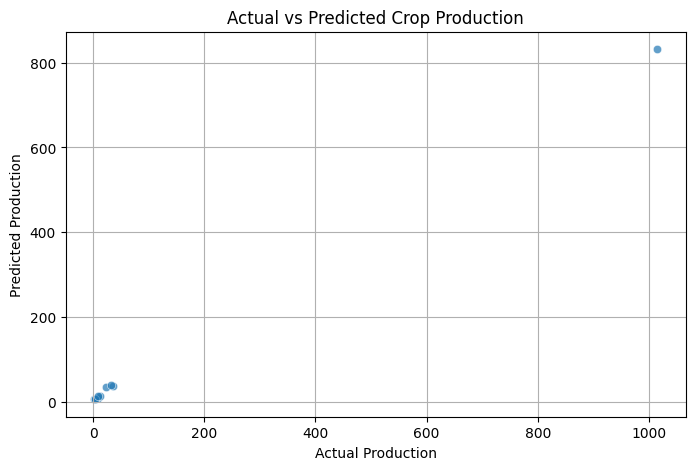

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Predict
y_pred = model.predict(X_test)

# 10. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 11. Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Crop Production")
plt.grid(True)
plt.show()